In [ ]:
from algorithms.initialization.KMeansPlusPlus import KMeansPlusPlus
from utilities.Preprocessor import Preprocessor
from utilities.Utilities import Utilities
from algorithms.KMeans import KMeans

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

import numpy as np

In [ ]:
### Load and Preprocess Data ###
pp = Preprocessor()

column_names = ["patient_id", "clump_thickness", "size_uniformity", "shape_uniformity", "marginal_adhesion", "epithelial_size", "bare_nuclei", "bland_chromatin", "normal_nucleoli", "mitosis", "class"]

# Load the data
pp.load_data("./data/breast-cancer-wisconsin.data", column_names=column_names, response_name="class", na_values=["?"], converters={"class": lambda value: 0 if int(value) == 2 else 1})

# Remove the patient_id column which contribute no valuable information
pp.drop_columns("patient_id")

# Remove any rows with missing samples
pp.drop_na()

# Standard normalize the data
pp.normalize()

pp.response

In [ ]:
### Reduce the Dimensionality of the Data Using PCA ###

# PCA transform the data, targeting two dimensions
pca_transformer = PCA(n_components=2)
transformed_data = pca_transformer.fit_transform(pp.data)

In [ ]:
# Verify that two clusters is ideal

num_clusters = 3
num_iter = 100

0.8242410937306489


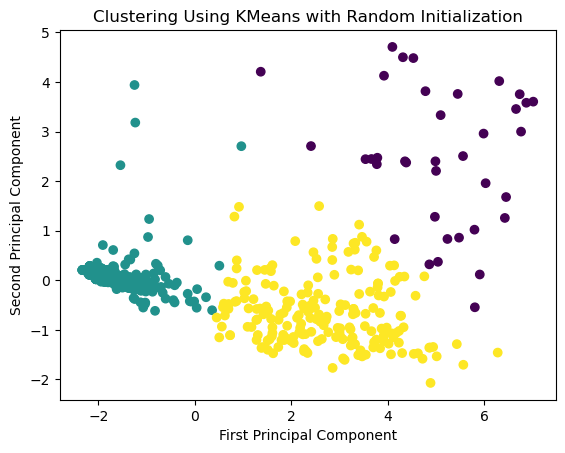

In [5]:
### Fit the KMeans Algorithm ###

# Create and apply KMeans transformer
total_f1 = 0

for i in range(num_iter):
    kmeans_transformer = KMeans(num_clusters, 0.001)
    kmeans_transformer.fit(np.array(transformed_data))

    # Compute F1 score
    kmeans_f1_score = Utilities.f_score(pp.response.to_numpy(), kmeans_transformer.cluster_assignment)

    total_f1 += kmeans_f1_score

print(total_f1 / num_iter)

# Plot the clustering
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=kmeans_transformer.cluster_assignment)
plt.title("Clustering Using KMeans with Random Initialization")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()

In [ ]:
### Fit the KMeans++ Algorithm ###

# Create and apply KMeans++ transformer
total_f1 = 0

for i in range(num_iter):
    kmeanspp_transformer = KMeans(num_clusters, 0.001, initialization_method=KMeansPlusPlus)
    kmeanspp_transformer.fit(np.array(transformed_data))

    # Compute F1 score
    kmeans_f1_score = Utilities.f_score(pp.response.to_numpy(), kmeanspp_transformer.cluster_assignment)

    total_f1 += kmeans_f1_score

print(total_f1 / num_iter)

# Plot the clustering
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=kmeanspp_transformer.cluster_assignment)
plt.title("Clustering Using KMeans with KMeans Plus Plus Initialization")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.show()